In [1]:
from tools import get_summary_graph, calculate_weights, update_summary_graph, get_summary_features, get_specific_graph_list

In [2]:
from dataset import get_dataset

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.svm import LinearSVC

In [5]:
import numpy as np

In [6]:
data_dir, positive_group, negative_group = 'children', 'asd', 'td'

In [7]:
pos_train_features, neg_train_features, pos_test_features, neg_test_features = get_dataset(data_dir, positive_group, negative_group, gamma=0.5, threshold=0.15, split_ratio=0.7)

Text(0.5, 1.0, 'The performance on training dataset')

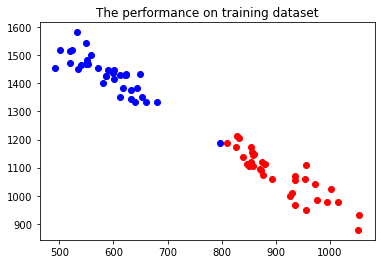

In [8]:
plt.scatter(pos_train_features[:, 0], pos_train_features[:, 1], c='r')
plt.scatter(neg_train_features[:, 0], neg_train_features[:, 1], c='b')
plt.title('The performance on training dataset')


In [9]:
neg_train_features.shape

(36, 2)

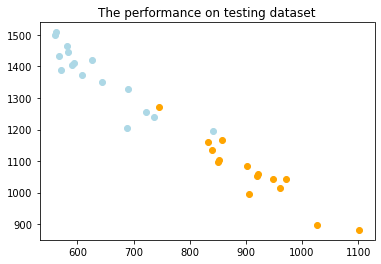

In [40]:
plt.scatter(pos_test_features[:, 0], pos_test_features[:, 1], c='orange')
plt.scatter(neg_test_features[:, 0], neg_test_features[:, 1], c='lightblue')
# plt.scatter(pos_train_features[:, 0], pos_train_features[:, 1], c='r')
# plt.scatter(neg_train_features[:, 0], neg_train_features[:, 1], c='b')
plt.title('The performance on testing dataset')
plt.show()

In [11]:
pos_train_features.shape, neg_train_features.shape, pos_test_features.shape, neg_test_features.shape

((34, 2), (36, 2), (15, 2), (16, 2))

In [12]:
train_x = np.concatenate([pos_train_features, neg_train_features])
train_y = np.array([0]*pos_train_features.shape[0]+[1]*neg_train_features.shape[0])

In [13]:
train_x.shape, np.array(train_y).shape

((70, 2), (70,))

In [34]:
clf = LinearSVC(max_iter=100000)
clf.fit(train_x, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=100000)

In [35]:
test_x = np.concatenate([pos_test_features, neg_test_features])
test_y = np.array([0]*pos_test_features.shape[0]+[1]*neg_test_features.shape[0])

In [36]:
train_result = (clf.predict(train_x) == train_y)

In [37]:
test_result = (clf.predict(test_x) == test_y)

In [41]:
float(train_result.sum()) / len(train_result)

1.0

In [42]:
float(test_result.sum()) / len(test_result)

0.9354838709677419

In [20]:
train_x.shape

(70, 2)

In [21]:
test_x.shape

(31, 2)

In [512]:
data = np.array([])

In [513]:
data.shape[0]

0

In [639]:
clf.coef_[0][0]/clf.coef_[0][1]

-0.07711597954805853